In [11]:
!git clone https://github.com/yizhou-wang/cruw-devkit.git

Cloning into 'cruw-devkit'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 266 (delta 0), reused 0 (delta 0), pack-reused 262
Receiving objects: 100% (266/266), 1.20 MiB | 1.95 MiB/s, done.
Resolving deltas: 100% (151/151), done.


In [1]:
%cd cruw-devkit

/home/vr-lab/Asish/8th Sem Radar Project/cruw-devkit


In [2]:
from cruw import CRUW
import numpy as np
import matplotlib.pyplot as plt
from cruw.mapping import ra2idx, idx2ra
import math
import os


In [4]:
data_root='/mnt/disk1/CRUW/ROD2021'
dataset = CRUW(data_root=data_root, sensor_config_name='sensor_config_rod2021')


In [6]:
scene_list = os.listdir("/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H/")
scene_list.sort()
print(scene_list)

['2019_04_09_BMS1000', '2019_04_09_BMS1001', '2019_04_09_BMS1002', '2019_04_09_CMS1002', '2019_04_09_PMS1000', '2019_04_09_PMS1001', '2019_04_09_PMS2000', '2019_04_09_PMS3000', '2019_04_30_MLMS000', '2019_04_30_MLMS001', '2019_04_30_MLMS002', '2019_04_30_PBMS002', '2019_04_30_PBMS003', '2019_04_30_PCMS001', '2019_04_30_PM2S003', '2019_04_30_PM2S004', '2019_05_09_BM1S008', '2019_05_09_CM1S004', '2019_05_09_MLMS003', '2019_05_09_PBMS004', '2019_05_09_PCMS002', '2019_05_23_PM1S012', '2019_05_23_PM1S013', '2019_05_23_PM1S014', '2019_05_23_PM1S015', '2019_05_23_PM2S011', '2019_05_29_BCMS000', '2019_05_29_BM1S016', '2019_05_29_BM1S017', '2019_05_29_MLMS006', '2019_05_29_PBMS007', '2019_05_29_PCMS005', '2019_05_29_PM2S015', '2019_05_29_PM3S000', '2019_09_29_ONRD001', '2019_09_29_ONRD002', '2019_09_29_ONRD005', '2019_09_29_ONRD006', '2019_09_29_ONRD011', '2019_09_29_ONRD013']


2019_04_09_BMS1000  over
2019_04_09_BMS1001  over


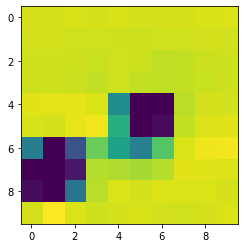

In [8]:
for scene in scene_list[0:2]:
    
    anno_path = os.path.join('/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW/TRAIN_RAD_H_ANNO',scene+'.txt')
    
    with open(anno_path) as f:
        lines = f.readlines()

    for line in lines[0:10]:
        words = line.split(" ")
        seq_num = int(words[0])
        rng = float(words[1])
        azm = float(words[2])
        label = words[3][:-1]

        rid, aid = ra2idx(rng, azm, dataset.range_grid, dataset.angle_grid)

        img_name = os.path.join('/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_SR/',scene,'%06d_0000.npy' % seq_num)

        fimg = np.load(img_name)
#         fimg = np.sqrt(np.square(img[:,:,0])+np.square(img[:,:,1]))

#         path = os.path.join('/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_seg', label, scene + "_%06d_0000.npy" % seq_num)
        seg_fimg = fimg[rid-5:rid+5,aid-5:aid+5]
        
        plt.imshow(seg_fimg)

#         np.save(path,seg_fimg)
    
    print(scene," over")


In [11]:
id, aid = ra2idx(10.0369, 0.5760, dataset.range_grid, dataset.angle_grid)

In [28]:
img = np.load('/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_SR/2019_05_09_BM1S008/000100_0000.npy')
print(img.shape)

(128, 128, 1)


67 98


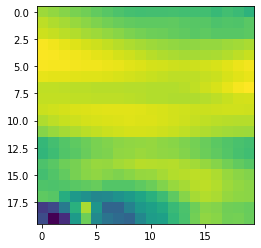

In [26]:
num=10
print(rid,aid)
plt.imshow(img[rid-num:rid+num,aid-num:aid+num])

In [72]:
a = np.load("/home/vr-lab/Asish/8th Sem Radar Project/Datasets/CRUW_seg/pedestrian/2019_05_29_PM2S015_000313_0000.npy")

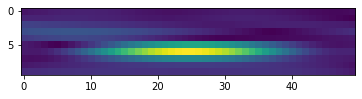

In [73]:
plt.imshow(a)